## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import keras.backend as K
import itertools
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITOR = ["val_loss","val_acc"]
PATIENCE = [5, 10, 25]

In [7]:
results = {}

for i, (mon, pat) in enumerate(itertools.product(MONITOR,PATIENCE)):
    K.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    earlystop = EarlyStopping(monitor=mon, patience=pat, verbose=1)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )
    # Collect results
    exp_name_tag = ("monitor: %s, patience: %i" % (mon, pat))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

Epoch 13/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2252 - acc: 0.5755 - val_loss: 1.4790 - val_acc: 0.4753
Epoch 14/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.2001 - acc: 0.5851 - val_loss: 1.4717 - val_acc: 0.4808
Epoch 15/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.1765 - acc: 0.5952 - val_loss: 1.4537 - val_acc: 0.4895
Epoch 16/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1538 - acc: 0.6032 - val_loss: 1.4534 - val_acc: 0.4870
Epoch 17/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.1308 - acc: 0.6116 - val_loss: 1.4633 - val_acc: 0.4914
Epoch 18/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.1070 - acc: 0.6216 - val_loss: 1.4480 - val_acc: 0.4938
Epoch 19/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.0863 - acc: 0.6294 - val_loss: 1.4518 - val_acc: 0.4923
Epoch 20/50
50000/50000 [=========

50000/50000 [==============================] - 4s 89us/step - loss: 0.8740 - acc: 0.7099 - val_loss: 1.4686 - val_acc: 0.4930
Epoch 31/50
50000/50000 [==============================] - 5s 94us/step - loss: 0.8556 - acc: 0.7195 - val_loss: 1.4761 - val_acc: 0.4943
Epoch 32/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.8368 - acc: 0.7263 - val_loss: 1.4840 - val_acc: 0.4951
Epoch 33/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.8179 - acc: 0.7342 - val_loss: 1.4973 - val_acc: 0.4946
Epoch 34/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.7984 - acc: 0.7402 - val_loss: 1.5258 - val_acc: 0.4848
Epoch 35/50
50000/50000 [==============================] - 4s 85us/step - loss: 0.7797 - acc: 0.7484 - val_loss: 1.5029 - val_acc: 0.4964
Epoch 36/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.7619 - acc: 0.7551 - val_loss: 1.5274 - val_acc: 0.4861
Epoch 37/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.1684 - acc: 0.2784 - val_loss: 2.0778 - val_acc: 0.3400
Epoch 2/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7281 - acc: 0.3964 - val_loss: 1.8061 - val_acc: 0.3916
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6081 - acc: 0.4370 - val_loss: 1.6768 - val_acc: 0.4161
Epoch 4/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5349 - acc: 0.4649 - val_loss: 1.6427 - val_acc: 0.4283
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4817 - acc: 0.4828 - val_loss: 1.5854 - val_acc: 0.4435
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.4370 - acc: 0.4979 - val_loss: 1.5559 - val_acc: 0.4534
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.3982 - acc: 0.5117 - val_loss: 1.5301 - val_ac

50000/50000 [==============================] - 5s 104us/step - loss: 2.2431 - acc: 0.2638 - val_loss: 2.1273 - val_acc: 0.3222
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7534 - acc: 0.3898 - val_loss: 1.8035 - val_acc: 0.3903
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6262 - acc: 0.4329 - val_loss: 1.6998 - val_acc: 0.4172
Epoch 4/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5485 - acc: 0.4624 - val_loss: 1.6185 - val_acc: 0.4302
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.4934 - acc: 0.4815 - val_loss: 1.5884 - val_acc: 0.4436
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.4485 - acc: 0.4951 - val_loss: 1.5701 - val_acc: 0.4469
Epoch 7/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.4090 - acc: 0.5099 - val_loss: 1.5600 - val_acc: 0.4468
Epoch 8/50
50000/50000 [===========================

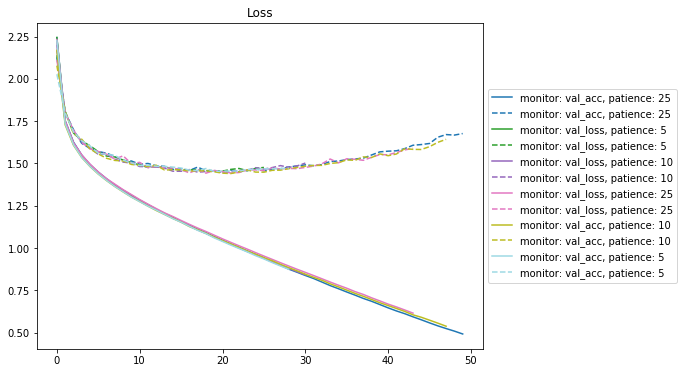

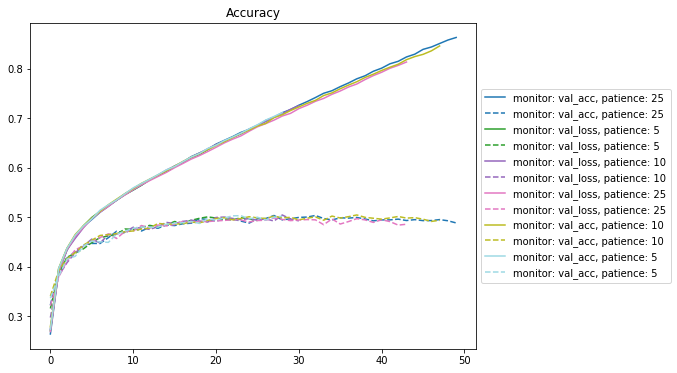

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 6

cm = plt.get_cmap('tab20')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()